# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.

Выполнил студент гр. 9382 Дерюгин Дмитрий, вариант 23.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при 𝑡 → +∞.

## Основные теоретические положения

Линейная однородная система с периодическими коэффициентами:
$X'=A(t)X, A(t+T)=A(t), t \geq 0$

$\Phi(t)$ - фундаментальная матрица данной системы, если ее столбцы линейно независимые решения этой системы. В матричной записи:
$\Phi'=A(t)\Phi$.

Матрица C, удовлетворяющая условию $\Phi(t+T)=\Phi(t)c, \forall t \geq 0$
называется основной для фундаментальной матрицы $\Phi(t)$

Спектральным радиусом матрицы называется максимум модуля ее собственных
чисел.
$\rho(a) =\underset{0\leq j\leq n}{max}|\lambda_j|$

## Постановка задачи

Дано дифференциальное уравнение:
$x''+a(p,t)x=0, a(p,t)=p+b(t), b(t+T)=b(t)$
где p – параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка: 

 $\begin{cases}
   u'_1 =u_2\\
   u'_2=-a(p,t)u_1
 \end{cases}$
 
Здесь $u_1(t)=x(t), u_2(t)=x'(t)$

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной периодической системе, а не только к системе вида (1).

## Выполнение работы

Функция $e^{sint}$

Задаем массив значений параметра p(значения от 0.1 до 50 с шагом 0.05), а также некоторые константы 

Вычисляем значение фундаментальной матрицы системы при t=T  и находим собственные числа матрицы C и ее спектральный радиус.


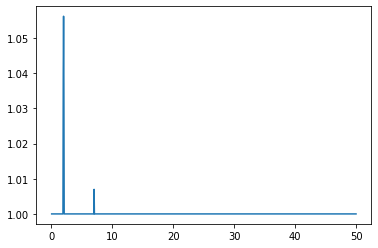

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

T = math.pi
p_arr = np.arange(0.1, 50, 0.05)
V1 = np.array([1, 0])
V2 = np.array([0, 1])

epsilon = 0.001

s = []

def f(U, t):
    return [U[1], -(p + np.exp(np.sin(t)))*U[0]]

def solution(p):
    uv1 = odeint(f, V1, [0, T])[-1]
    uv2 = odeint(f, V2, [0, T])[-1]
    
    C=np.array([[uv1[0],uv2[0]],
                [uv1[1],uv2[1]]])
    eigenvalues = np.linalg.eigvals(C)
    
    spectral_radius = max(abs(eigenvalues))
    
    s.append(spectral_radius)

for p in p_arr:
    solution(p)
   

plt.plot(p_arr,s)
    

Найдем границу устойчивости и неустойчивости с точностю до 0.001

In [84]:
r_0 = 0

for i in range(len(s) - 1, -1, -1):
    if abs(s[i]) > 1 + epsilon:
        p_0 = p_arr[i]
        break;
print(p_0)
        

7.050000000000002


## Выводы

В ходе данной лабораторной работы было проведено исследование однородного линейного уравнения с периодическими коэффициентами. Была найдена граница зоны устойчивости и неустойчивости $p_0=7.05$ с точностью 0.001